In [23]:
import pandas as pd
import numpy as np
import random
import sys
sys.path.append('../..')
from modules.many_features import utils, constants
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def create_sankey(df, title, save, filename): #shows true and false positives 
    pos_df = df[df.y_actual == df.y_pred]
    neg_df = df[df.y_actual != df.y_pred]
    utils.draw_sankey_diagram(pos_df, neg_df, title, save, filename)

#### Test df

In [14]:
test_df = pd.read_csv('../../test_dfs/many_features/0.1/correlated/constant_test_set/test_df_noisy6_17000000.csv')
test_df.head()

,episode_length,index,is_success,reward,terminated,trajectory,y_actual,y_pred
0,4.0,0.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'ret_count', 'Aplastic a...",6.0,6.0
1,4.0,1.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",2.0,2.0
2,4.0,2.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",2.0,2.0
3,4.0,3.0,0.0,-1.0,1.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",5.0,7.0
4,4.0,4.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'ret_count', 'Hemolytic ...",5.0,5.0


In [15]:
test_df_sans_inconc = test_df[~((test_df.y_actual == 7.0) | (test_df.y_pred ==7.0))]

../..\modules\many_features\utils.py:379: MatplotlibDeprecationWarning:


The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.

../..\modules\many_features\utils.py:380: MatplotlibDeprecationWarning:


The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.

../..\modules\many_features\utils.py:382: MatplotlibDeprecationWarning:


The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.

../..\modules\many_features\utils.py:383: MatplotlibDeprecationWarning:


The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.



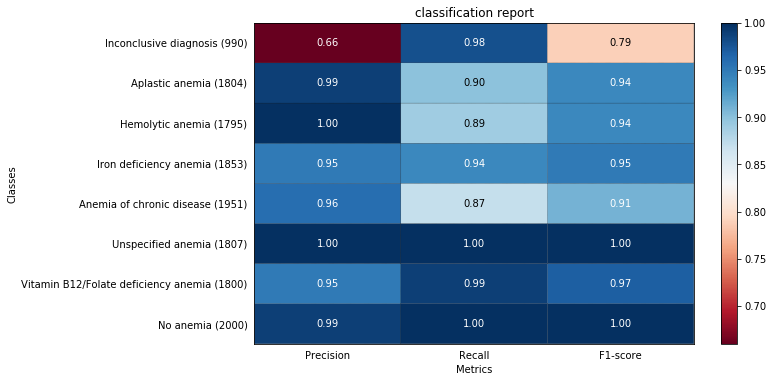

In [16]:
utils.plot_classification_report(test_df['y_actual'], test_df['y_pred'])

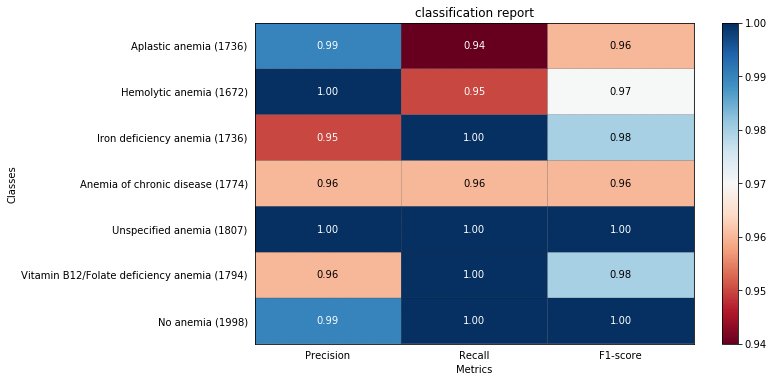

In [17]:
utils.plot_classification_report(test_df_sans_inconc['y_actual'], test_df_sans_inconc['y_pred'])

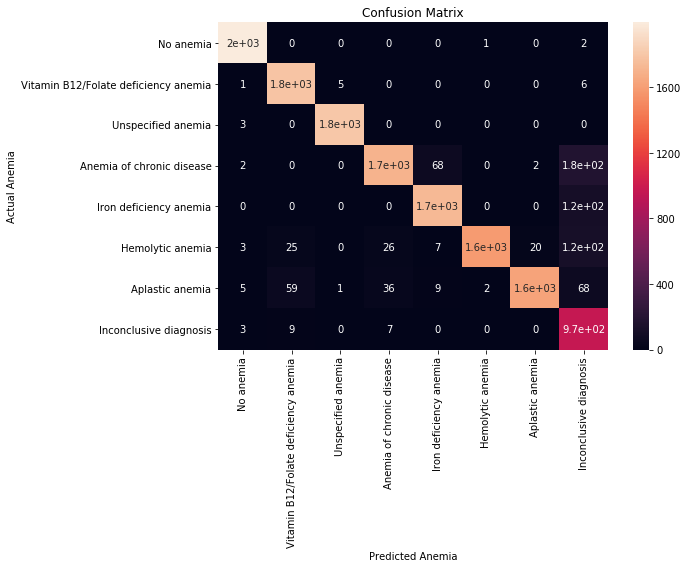

In [6]:
utils.plot_confusion_matrix(test_df['y_actual'], test_df['y_pred'])

In [25]:
def plot_confusion_matrix(y_actual, y_pred, save=False, filename=False):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(y_actual, y_pred)
    classes = ['No anemia', 'Vitamin B12/Folate deficiency anemia', 'Unspecified anemia', 'Anemia of chronic disease', 
               'Iron deficiency anemia', 'Hemolytic anemia', 'Aplastic anemia']
    cm_df = pd.DataFrame(cm, index = classes, columns = classes)
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(cm_df, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Anemia')
    plt.xlabel('Predicted Anemia')
    plt.tight_layout()
    if save:
        plt.savefig(filename)
    plt.show()
    plt.close()

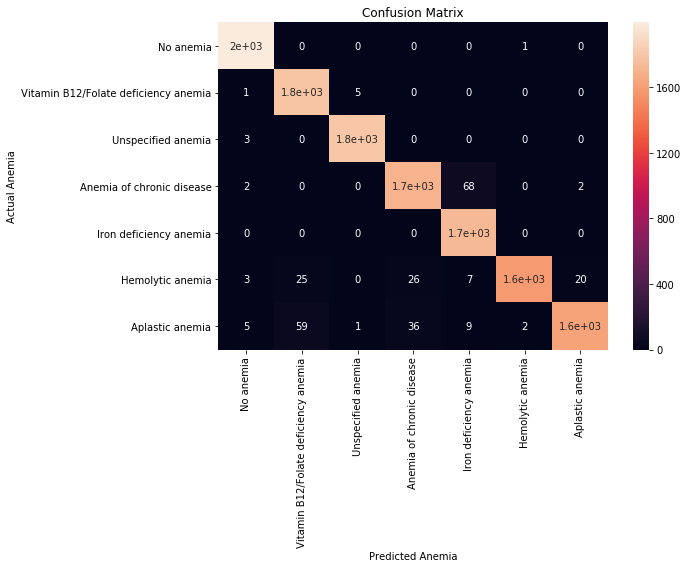

In [26]:
plot_confusion_matrix(test_df_sans_inconc['y_actual'], test_df_sans_inconc['y_pred'])

In [7]:
create_sankey(test_df, 'Overall pathways', True, 
              filename = '../../pathways/many_features/0.1/correlated/red_and_green/constant_test_set/test_df3_noisy6_17000000')

#### Success df

In [8]:
success_df = pd.read_csv('../../test_dfs/many_features/0.1/correlated/constant_test_set/success_df_noisy6_17000000.csv')
create_sankey(success_df, 'Pathways of successful episodes', save=True, 
              filename='../../pathways/many_features/0.1/correlated/red_and_green/constant_test_set/success_df_17000000')

In [8]:
# utils.draw_sankey_diagram(success_df, 'Pathways of successful episodes', save=True, 
#                          filename='../../pathways/many_features/0.1/correlated/tsuccess_df3_noisy6_230000000')

In [14]:
# for i in range(constants.CLASS_NUM):
#     print(utils.anemias[i])
#     anemia_df = test_df[test_df.y_pred==i]
#     if len(anemia_df!=0):
#         utils.draw_sankey_diagram(anemia_df, utils.generate_title(i, len(anemia_df)), save=True, 
#                                   filename=f'../../pathways/many_features/0.1/correlated/{utils.generate_filename(i)}_noisy6_23000000')

In [9]:
#precision - shows true positives and false positives
for i in range(constants.CLASS_NUM):
    print(utils.anemias[i])
    anemia_df = test_df[test_df.y_pred==i]
    if len(anemia_df != 0):
        create_sankey(anemia_df, utils.generate_title(i, len(anemia_df)), save=True, 
              filename=f'../../pathways/many_features/0.1/correlated/red_and_green/constant_test_set/{utils.generate_filename(i)}_noisy6_17000000')

No anemia


Vitamin B12/Folate deficiency anemia


Unspecified anemia


Anemia of chronic disease


Iron deficiency anemia


Hemolytic anemia


Aplastic anemia


Inconclusive diagnosis


In [10]:
# recall - shows true positives and flase negatives
for i in range(constants.CLASS_NUM):
    anemia_df = test_df[test_df.y_actual == i]
    if len(anemia_df != 0):
        create_sankey(anemia_df, utils.generate_title(i, len(anemia_df)), save=True, 
              filename=f'../../pathways/many_features/0.1/correlated/red_and_green/constant_test_set/recall/{utils.generate_filename(i)}_noisy6_17000000')
        